C:\Users\Zoha-PC\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


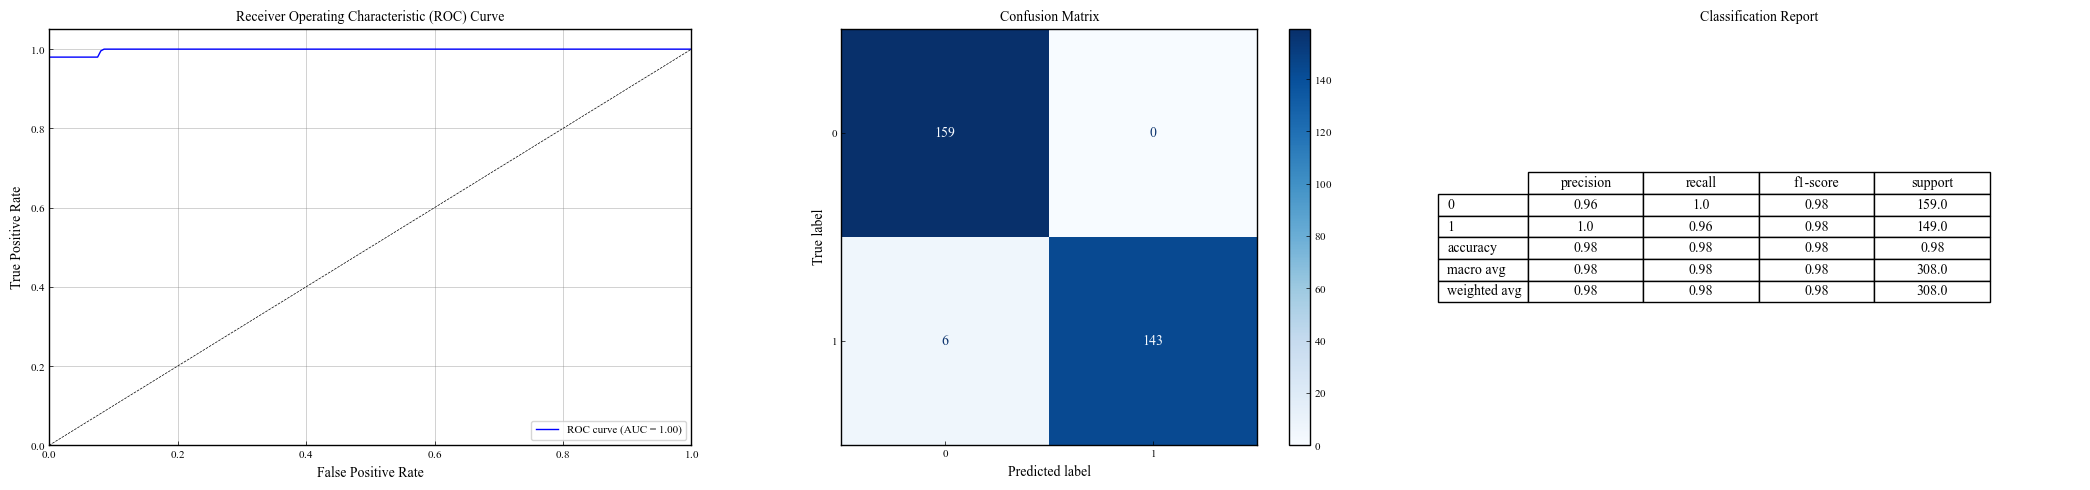

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def plot_roc_and_classification_report(data, target, features, test_size=0.3, random_state=42, output_filename='bagging_roc_and_classification_report.png', dpi=500):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=test_size, random_state=random_state)

    # Initialize the Bagging Classifier with Decision Trees as the base estimator
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=random_state)

    # Fit the model to the training data
    bagging_clf.fit(X_train, y_train)

    # Predict probabilities and labels for the test data
    y_prob = bagging_clf.predict_proba(X_test)[:, 1]
    y_pred = bagging_clf.predict(X_test)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute AUC
    auc = roc_auc_score(y_test, y_prob)

    # Interpolation for smoothing
    fpr_new = np.linspace(0, 1, 200)
    interp_func = interp1d(fpr, tpr, kind='linear')
    tpr_smooth = interp_func(fpr_new)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Set IEEE style parameters
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'text.usetex': False,
        'font.size': 10,
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'legend.fontsize': 8,
        'axes.linewidth': 1,
        'lines.linewidth': 1,
        'grid.linewidth': 0.5,
        'legend.frameon': True,
        'legend.loc': 'best',
        'grid.color': 'gray',  # Set grid color
        'grid.alpha': 0.5,     # Set grid transparency
        'axes.edgecolor': 'k',
        'axes.labelcolor': 'k',
        'xtick.color': 'k',
        'ytick.color': 'k',
        'xtick.major.width': 0.5,
        'ytick.major.width': 0.5,
        'xtick.major.size': 3,
        'ytick.major.size': 3,
        'xtick.direction': 'in',
        'ytick.direction': 'in',
        'xtick.major.pad': 3,
        'ytick.major.pad': 3,
        'axes.labelpad': 4,
        'axes.formatter.use_mathtext': True
    })

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(21, 5))  # Adjust figure size as needed

    # Plot ROC curve
    axs[0].plot(fpr_new, tpr_smooth, label=f'ROC curve (AUC = {auc:.2f})', color='b')
    axs[0].plot([0, 1], [0, 1], 'k--', lw=0.5)
    axs[0].set_xlim([0.0, 1.0])
    axs[0].set_ylim([0.0, 1.05])
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    # Plot confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(ax=axs[1], cmap='Blues', values_format='d')
    axs[1].set_title('Confusion Matrix')
    axs[1].grid(False)  # Disable grid for the confusion matrix

    # Plot classification report as a table
    axs[2].axis('off')  # Hide the axis
    table = axs[2].table(cellText=report_df.values.round(2), colLabels=report_df.columns, rowLabels=report_df.index, loc='center', cellLoc='center', colWidths=[0.15]*len(report_df.columns))
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    axs[2].set_title('Classification Report')

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(output_filename, dpi=dpi)
    plt.show()

# Example usage:
if __name__ == '__main__':
    # Load the data (replace this with your data)
    heart_data = pd.read_csv("heart.csv")

    # Define target and features
    target = 'target'  # Replace with your target column name
    features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']  # Replace with your feature column names

    # Plot ROC curve, confusion matrix, and classification report
    plot_roc_and_classification_report(heart_data, target, features, output_filename='bagging_roc_and_classification_report.png', dpi=500)
